In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Load the dataframe

In [45]:
df = pd.read_csv("modified building data.csv")
df.head()

,building_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,damage_grade
0,164002,3,20,560,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",Grade 2
1,164081,2,21,200,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",Grade 2
2,164089,3,18,315,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",Grade 2
3,164098,2,45,290,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",Grade 3
4,164103,2,21,230,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",Grade 3


In [46]:
df.shape

(549, 14)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   building_id             549 non-null    int64 
 1   count_floors_pre_eq     549 non-null    int64 
 2   age_building            549 non-null    int64 
 3   plinth_area_sq_ft       549 non-null    int64 
 4   height_ft_pre_eq        549 non-null    int64 
 5   land_surface_condition  549 non-null    object
 6   foundation_type         549 non-null    object
 7   roof_type               549 non-null    object
 8   ground_floor_type       549 non-null    object
 9   other_floor_type        549 non-null    object
 10  position                549 non-null    object
 11  plan_configuration      549 non-null    object
 12  superstructure          549 non-null    object
 13  damage_grade            549 non-null    object
dtypes: int64(5), object(9)
memory usage: 60.2+ KB


In [50]:
df.isnull().sum()

building_id               0
count_floors_pre_eq       0
age_building              0
plinth_area_sq_ft         0
height_ft_pre_eq          0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
plan_configuration        0
superstructure            0
damage_grade              0
dtype: int64

In [4]:
### Create a binary target. Extract the number. Numbers above 4 is severe damage. drop the damage grade
df["damage_grade"] = df["damage_grade"].str[-1].astype(int)
df["severe_damage"] = (df["damage_grade"] > 3).astype(int)
df = df.drop(columns = "damage_grade", axis = 1)
df.head()

,building_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
0,164002,3,20,560,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
1,164081,2,21,200,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
2,164089,3,18,315,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
3,164098,2,45,290,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
4,164103,2,21,230,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0


In [5]:
df["severe_damage"].value_counts()

1    375
0    174
Name: severe_damage, dtype: int64

In [6]:
#Correlation Heatmap. Looking at the numeric features only. do this with select dtype function
correlation = df.select_dtypes("number").drop(columns = "severe_damage").corr()
correlation

,building_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq
building_id,1.000000,-0.023228,0.085310,-0.035685,-0.034674
count_floors_pre_eq,-0.023228,1.000000,0.186060,0.201827,0.757059
age_building,0.085310,0.186060,1.000000,-0.077321,0.101573
plinth_area_sq_ft,-0.035685,0.201827,-0.077321,1.000000,0.340212
height_ft_pre_eq,-0.034674,0.757059,0.101573,0.340212,1.000000


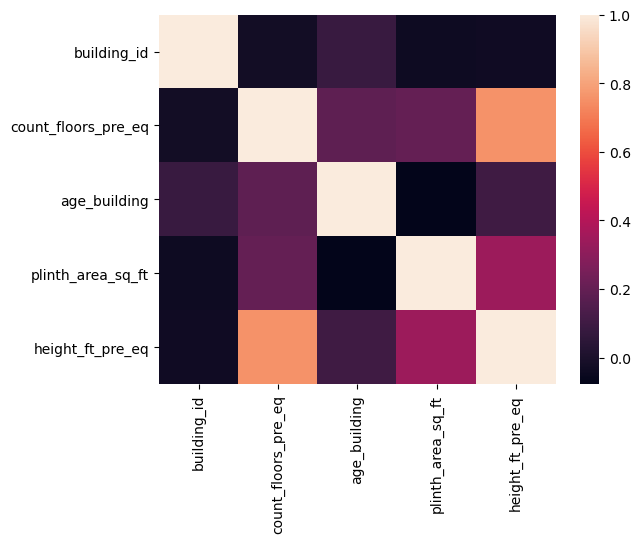

In [7]:
#Plot correlation plot
sns.heatmap(correlation)
plt.show()

In [8]:
#Drop multi collinearity column
df.drop(columns = "count_floors_pre_eq", inplace = True)

Using seaborn to create a boxplot that shows the distributions of the "height_ft_pre_eq" column for both groups in the "severe_damage" column. Remember to label your axes.

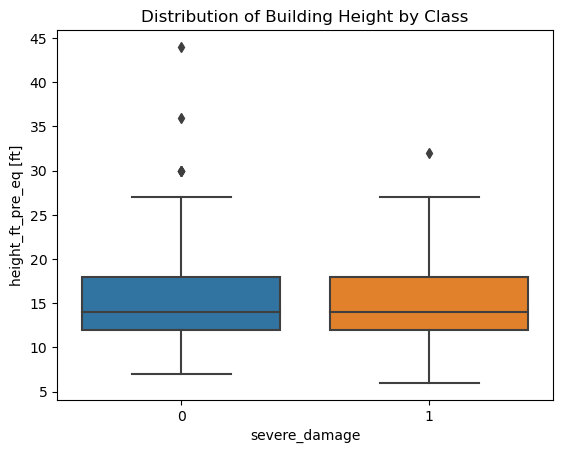

In [9]:
# Create boxplot
sns.boxplot(x = "severe_damage", y = "height_ft_pre_eq", data = df)

# Label axes
plt.xlabel("severe_damage")
plt.ylabel("height_ft_pre_eq [ft]")
plt.title("Distribution of Building Height by Class");
plt.show()

Create a bar chart of the value counts for the "severe_damage" column. You want to calculate the relative frequencies of the classes, not the raw count, so be sure to set the normalize argument to True. Let's see relative proportion of severe damage and non severe damage

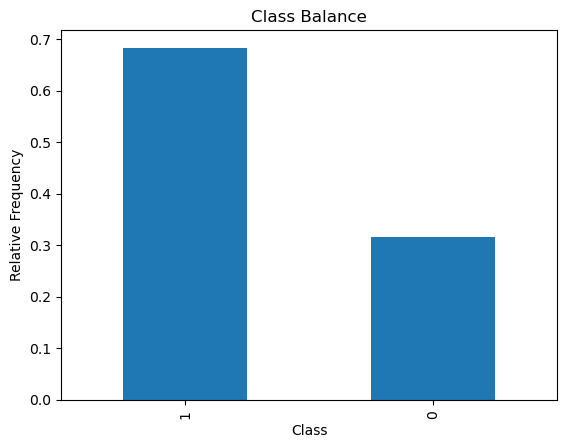

In [10]:
df["severe_damage"].value_counts(normalize = True).plot(
   kind = "bar", xlabel = "Class", ylabel = "Relative Frequency", title = "Class Balance"
)
plt.show();

In [11]:
#Majority Class = 1 and minority class = 0. 
majority_class_prop, minority_class_prop = df["severe_damage"].value_counts(normalize = True)
print(majority_class_prop, minority_class_prop)

0.6830601092896175 0.31693989071038253


Combine the select_dtypes and nunique methods to see if there are any high- or low-cardinality categorical features in the dataset.

In [12]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

land_surface_condition    3
foundation_type           4
roof_type                 3
ground_floor_type         5
other_floor_type          4
position                  3
plan_configuration        6
superstructure            9
dtype: int64

In [13]:
#Drop building_id column. High cardinality column
df.drop(columns = "building_id", inplace = True)

In [14]:
one_hot_encode_cols = df.dtypes[df.dtypes == "object"]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

In [15]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,severe_damage,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,...,plan_configuration_Square,plan_configuration_T-shape,superstructure_Bamboo,"superstructure_Brick, cement mortar","superstructure_Brick, mud mortar","superstructure_RC, non-engineered",superstructure_Stone,"superstructure_Stone, cement mortar","superstructure_Stone, mud mortar",superstructure_Timber
0,20,560,18,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,21,200,12,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,18,315,20,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,45,290,13,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,21,230,13,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [16]:
target = "severe_damage"
X = df.drop(columns = target)
y = df[target]

In [17]:
# students get this 
ScaledDT = StandardScaler()
X = ScaledDT.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (439, 32)
y_train shape: (439,)
X_test shape: (110, 32)
y_test shape: (110,)


In [19]:
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 

In [20]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=5)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [21]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7220219435736678


Plotting the confusion matrix

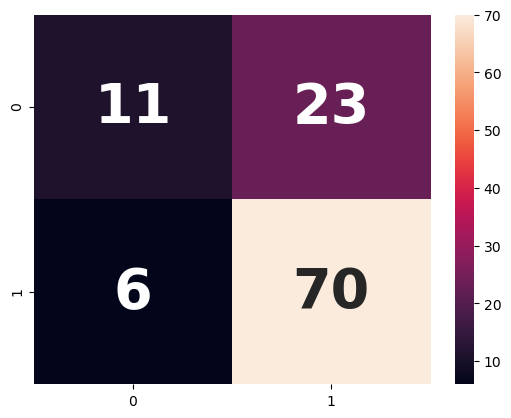

In [22]:
yhat = logreg_cv.predict(X_test)
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
plt.show()

Calculate the accuracy on the test data using the method score

In [23]:
METHOD = []
METHOD.append(logreg_cv.score(X_test, y_test))
print("Accuracy is {}".format(logreg_cv.score(X_test, y_test)))

Accuracy is 0.7363636363636363


### Decision Trees

In [24]:
Tree = DecisionTreeClassifier(random_state=42)
Tree = Tree.fit(X_train, y_train)

The number of nodes and the maximum actual depth.

In [25]:
Tree.tree_.node_count, Tree.tree_.max_depth

(249, 19)

In [26]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,11)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [27]:
tree_cv = GridSearchCV(tree, parameters, cv = 5)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [28]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.737957157784744


Calculate the accuracy of tree_cv on the test data using the method score:

In [29]:
METHOD.append(tree_cv.score(X_test, y_test))
print("Accuracy is {}".format(tree_cv.score(X_test, y_test)))

Accuracy is 0.7


Confusion matrix

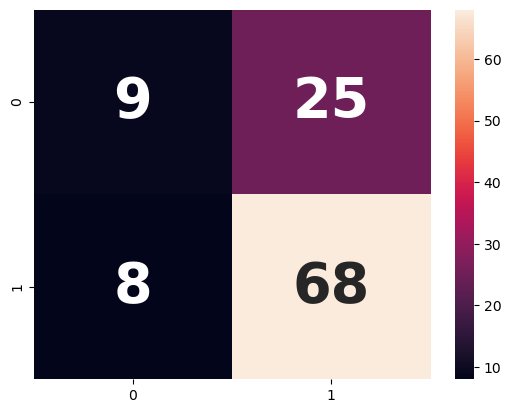

In [30]:
yhat = tree_cv.predict(X_test)
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
plt.show()

### Using KNearest

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [31]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [32]:
knn_cv = GridSearchCV(KNN, parameters, cv = 5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [33]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.726619644723093


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [34]:
METHOD.append(knn_cv.score(X_test, y_test))
print("Accuracy is {}".format(knn_cv.score(X_test, y_test)))

Accuracy is 0.6909090909090909


Plotting the confusion matrix

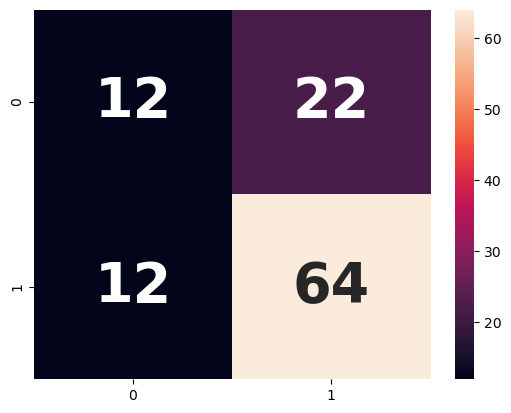

In [35]:
yhat = knn_cv.predict(X_test)
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
plt.show()

### Using Random Forest

parameters = {'criterion': ['gini', 'entropy'],
              
              
     'max_depth': [2*n for n in range(1,11)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

RF = RandomForestClassifier()

In [36]:
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': [2*n + 1 for n in range(10)],              
              'max_depth' : [2*n + 1 for n in range(5)],
              'max_features':["auto", "sqrt", "log2"]}

RF = RandomForestClassifier()

In [37]:
RF_cv = GridSearchCV(RF, param_grid, cv = 5, scoring='accuracy')
RF_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [38]:
print("tuned hpyerparameters :(best parameters) ",RF_cv.best_params_)
print("accuracy :", RF_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 7}
accuracy : 0.737957157784744


Calculate the accuracy of RF_cv on the test data using the method score

In [39]:
METHOD.append(RF_cv.score(X_test, y_test))
print("Accuracy is {}".format(RF_cv.score(X_test, y_test)))

Accuracy is 0.7363636363636363


Plotting the confusion matrix

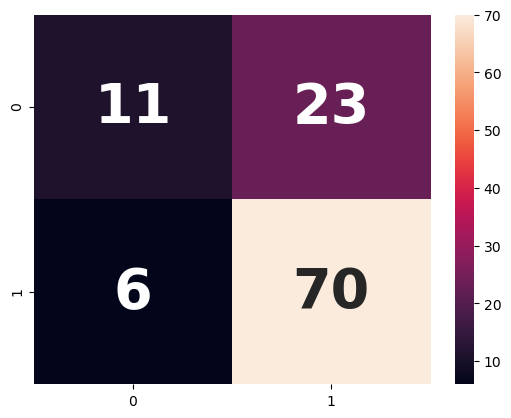

In [40]:
yhat = RF_cv.predict(X_test)
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
plt.show()

In [42]:
Results = pd.DataFrame({    
    "Methods" : ["Logistic Regression", "Decision Tree", "KNN", "Random Forest"],    
    "Train Accuracy" : [logreg_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_, RF_cv.best_score_],
    "Test_Accuracy": METHOD   
})
Results

,Methods,Train Accuracy,Test_Accuracy
0,Logistic Regression,0.722022,0.736364
1,Decision Tree,0.737957,0.700000
2,KNN,0.726620,0.690909
3,Random Forest,0.737957,0.736364


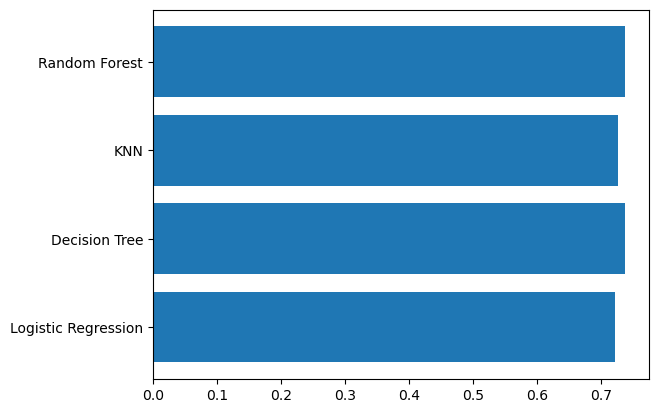

In [43]:
y = ["Logistic Regression", "Decision Tree", "KNN", "Random Forest"]
x = [logreg_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_, RF_cv.best_score_]

plt.barh(y = y, width = x)
plt.show()